In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
patient_data = pd.read_csv('healthcare_dataset.csv')


In [3]:
print(patient_data.head())


                  Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Eme

In [4]:
print(patient_data.describe())


                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.452200    25516.806778    300.082000
std       19.588974    14067.292709    115.806027
min       18.000000     1000.180837    101.000000
25%       35.000000    13506.523967    199.000000
50%       52.000000    25258.112566    299.000000
75%       68.000000    37733.913727    400.000000
max       85.000000    49995.902283    500.000000


In [5]:
print(patient_data.isnull().sum())


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [6]:
patient_data.dropna(inplace=True)


In [7]:
for col in patient_data.select_dtypes(include=['float64', 'int64']).columns:
    patient_data[col].fillna(patient_data[col].median(), inplace=True)


In [8]:
patient_data['Age_Gender'] = patient_data['Age'] * patient_data['Gender']


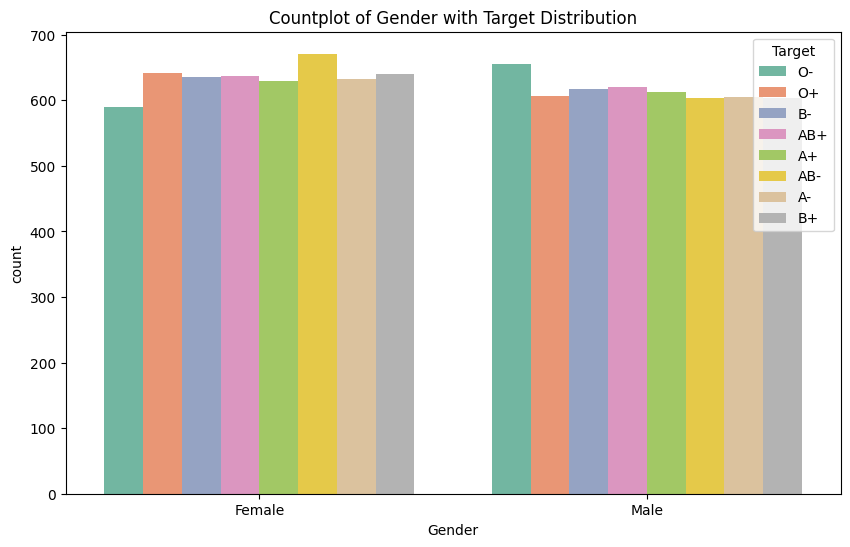

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Blood Type', data=patient_data, palette='Set2')
plt.title('Countplot of Gender with Target Distribution')
plt.xlabel('Gender')
plt.legend(title='Target')

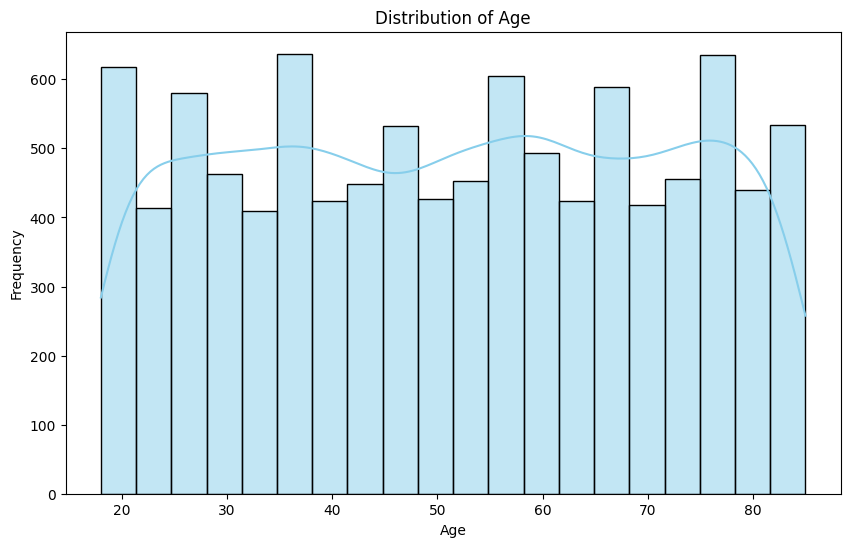

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(patient_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

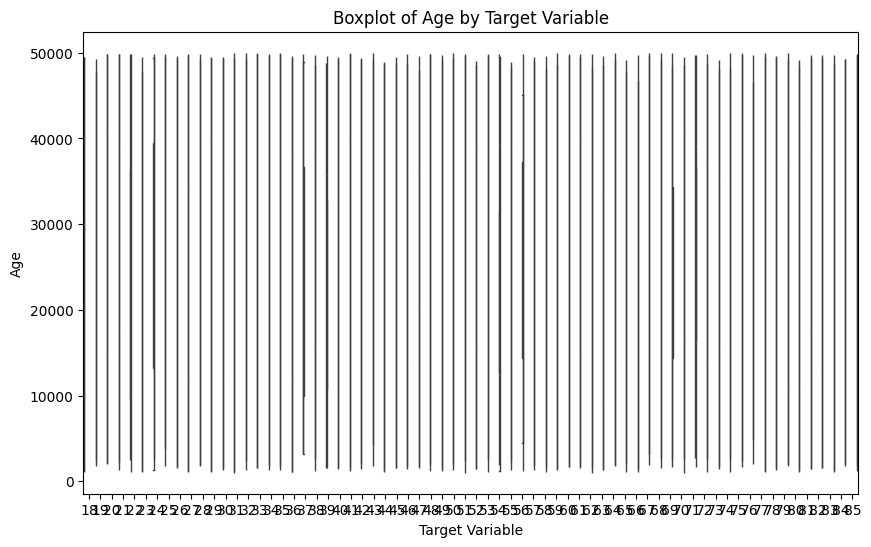

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Billing Amount', data=patient_data, hue='Age_Gender', legend=False)
plt.title('Boxplot of Age by Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Age')
plt.show()

In [11]:
print(patient_data.columns)


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Age_Gender'],
      dtype='object')


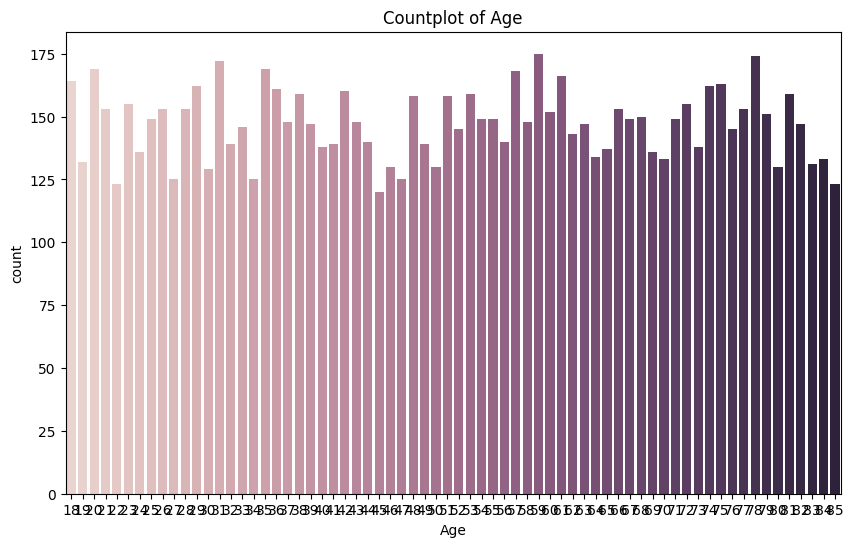

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=patient_data, hue='Age', legend=False)
plt.title('Countplot of Age')
plt.xlabel('Age')
plt.show()

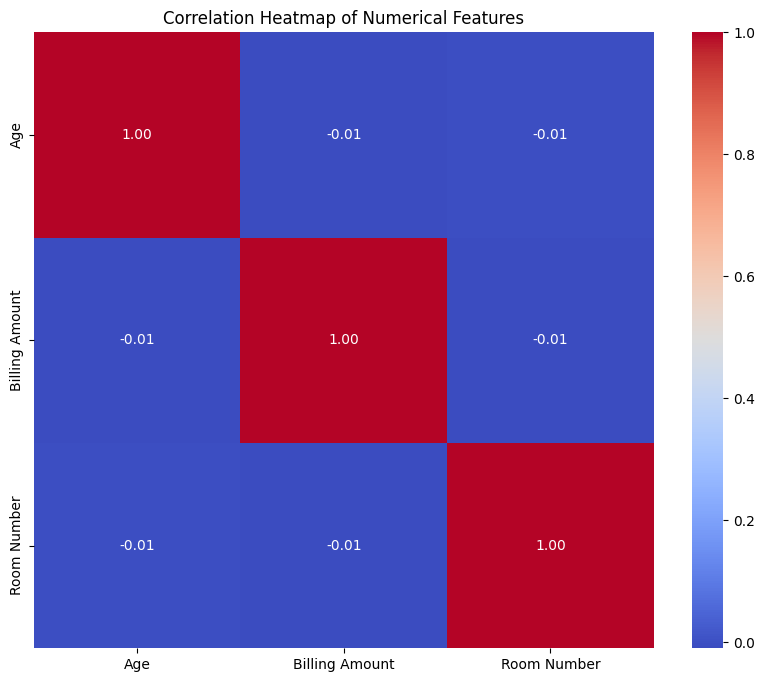

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(patient_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()